# Trying Face Recognition
### Tutorial is from Matthew Berman's video https://www.youtube.com/watch?v=Y0dLgtF4IHM.
We will be using PostgreSQL through Aiven platform for storing vector representation of the detected faces. The reason for using vector is because it would be easier to compare the faces using vector.

In [1]:
# Import the libraries
import cv2
import numpy as np
from imgbeddings import imgbeddings
from PIL import Image
import psycopg2
import os

c:\Users\Deciano\.virtualenvs\face_recog_test-8mufUMJc\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
# We will use a team picture "realmadrid.jpg"
alg = "haarcascade_frontalface_default.xml"
haar_cascade = cv2.CascadeClassifier(alg)
file_name = "realmadrid.jpg"
img = cv2.imread(file_name)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imshow('gray image test', img_gray)
cv2.waitKey(0)

-1

In [3]:
detection = haar_cascade.detectMultiScale(
    img_gray,
    scaleFactor= 1.05,
    minNeighbors=4,
    minSize=(200, 200)
)

i = 0

for x, y, w, h in detection:
    cropped_image = img[y : y+h, x : x + w]
    target_file_name = 'stored-faces/' + str(i) + ".jpg"
    cv2.imwrite(
        target_file_name,
        cropped_image
    )
    i = i + 1;

In [5]:
conn = psycopg2.connect("<your url>")

for filename in os.listdir("stored-faces"):
    img = Image.open("stored-faces/" + filename)
    ibed = imgbeddings()
    embedding = ibed.to_embeddings(img)
    cur = conn.cursor()
    cur.execute("INSERT INTO pictures values (%s,%s)", (filename, embedding[0].tolist()))
    print(filename)
conn.commit()

0.jpg
1.jpg
10.jpg
11.jpg
2.jpg
3.jpg
4.jpg
5.jpg
6.jpg
7.jpg
8.jpg
9.jpg


In [6]:
compare_file = "ronaldo.jpg"
img_compare = Image.open(compare_file)
ibed = imgbeddings()
embedding = ibed.to_embeddings(img_compare)

c:\Users\Deciano\.virtualenvs\face_recog_test-8mufUMJc\lib\site-packages\huggingface_hub\utils\_deprecation.py:131: FutureWarning: 'cached_download' (from 'huggingface_hub.file_download') is deprecated and will be removed from version '0.26'. Use `hf_hub_download` instead.
  warnings.warn(warning_message, FutureWarning)
c:\Users\Deciano\.virtualenvs\face_recog_test-8mufUMJc\lib\site-packages\huggingface_hub\file_download.py:672: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(
c:\Users\Deciano\.virtualenvs\face_recog_test-8mufUMJc\lib\site-packages\transformers\models\clip\processing_clip.py:149: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(


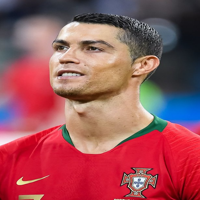

In [20]:
img_resized = img_compare.resize((200,200))
display(img_resized)

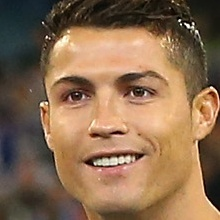

In [7]:
from IPython.display import Image, display

cur = conn.cursor()
string_representation = "["+ ",".join(str(x) for x in embedding[0].tolist()) +"]"
cur.execute("SELECT * FROM pictures ORDER BY embedding <-> %s LIMIT 1;", (string_representation,))
rows = cur.fetchall()
for row in rows:
    display(Image(filename="stored-faces/"+row[0]))
cur.close()

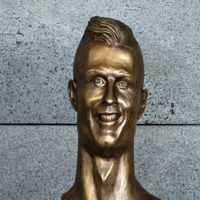

In [41]:
img_statue = Image.open("statue.jpeg")
embedding_statue = ibed.to_embeddings(img_statue)
img_resized = img_statue.resize((200,200))
display(img_resized)

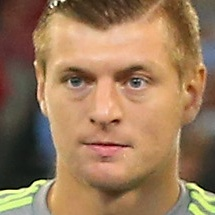

In [40]:
from PIL import Image
from IPython.display import display

cur = conn.cursor()

cur.execute("SELECT * FROM pictures ORDER BY embedding <-> %s LIMIT 1;", (string_representation,))
rows = cur.fetchall()

for row in rows:
    image_path = f"stored-faces/{row[0]}"
    display(Image.open(image_path))  # Ensure you're using Image.open

cur.close()